# Import datasets from kaggle

In [ ]:
# Install Kaggle API library
!pip install -q kaggle

# Upload your kaggle.json file
from google.colab import files

files.upload()

# Create a Kaggle folder and move the API key there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# PlantVillage Dataset
!kaggle datasets download -d abdallahalidev/plantvillage-dataset
!unzip plantvillage-dataset.zip -d plantvillage

# Wheat Leaf Dataset
!kaggle datasets download -d olyadgetch/wheat-leaf-dataset
!unzip wheat-leaf-dataset.zip -d wheat_leaf

# Rice Disease Dataset
!kaggle datasets download -d anshulm257/rice-disease-dataset
!unzip rice-disease-dataset.zip -d rice_disease

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___healthy/839daf12-8d8b-478e-b214-2d5dd0fa509a___GH_HL Leaf 445.1_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___healthy/83a8e340-30f9-4e2f-b825-a1078d5c63cf___RS_HL 0033_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___healthy/83d9992c-b4ee-41f5-b3eb-792afd464f4e___RS_HL 9629_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___healthy/83eb200d-ef9d-4b98-b4c1-58b7f0b169e4___RS_HL 0421_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___healthy/83fa8d6f-4c08-46bf-b4cf-7a33d4fe0031___GH_HL Leaf 180_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___healthy/8425f91b-b758-4e82-a7cc-6ecc862c1a00___RS_HL 0255_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___healthy/846276a

# Data organization

In [ ]:
import os
import shutil

# Define the base directory for processed data
base_dir = "dataset"
os.makedirs(base_dir, exist_ok=True)

# Define categories and diseases for each crop
categories = {
    "rice": ["bacterial_leaf_blight", "brown_spot", "sheath_blight", "leaf_blast", "leaf_scald", "healthy"],
    "wheat": ["septoria", "stripe_rust", "healthy"],
    "corn": ["cercospora_leaf_spot", "common_rust", "northern_leaf_blight", "healthy"],
    "strawberry": ["scorch", "healthy"],
    "tomato": ["bacterial_spot", "early_blight", "late_blight", "septoria_leaf_spot", "yellow_leaf_curl_virus", "healthy", "target_spot", "leaf_mold", "spider_mites", "mosaic_virus"]
}

# Create directories for each crop and disease
for crop, diseases in categories.items():
    crop_dir = os.path.join(base_dir, crop)
    os.makedirs(crop_dir, exist_ok=True)
    for disease in diseases:
        os.makedirs(os.path.join(crop_dir, disease), exist_ok=True)

# Function to move images based on category and disease
def organize_images_by_disease(source_base, crop, disease_mapping):
    crop_dir = os.path.join(base_dir, crop)
    for disease, source_folders in disease_mapping.items():
        disease_dir = os.path.join(crop_dir, disease)
        for folder in source_folders:
            full_path = os.path.join(source_base, folder)
            if os.path.exists(full_path):
                for file in os.listdir(full_path):
                    file_path = os.path.join(full_path, file)
                    shutil.copy(file_path, disease_dir)

# Define source folders for each disease
disease_mapping_rice = {
    "bacterial_leaf_blight": ["/content/rice_disease/Rice_Leaf_AUG/Bacterial Leaf Blight"],
    "brown_spot": ["/content/rice_disease/Rice_Leaf_AUG/Brown Spot"],
    "sheath_blight": ["/content/rice_disease/Rice_Leaf_AUG/Sheath Blight"],
    "leaf_blast": ["/content/rice_disease/Rice_Leaf_AUG/Leaf Blast"],
    "leaf_scald": ["/content/rice_disease/Rice_Leaf_AUG/Leaf scald"],
    "healthy": ["/content/rice_disease/Rice_Leaf_AUG/Healthy Rice Leaf"]
}
disease_mapping_wheat = {
    "septoria": ["/content/wheat_leaf/wheat_leaf/septoria"],
    "stripe_rust": ["/content/wheat_leaf/wheat_leaf/stripe_rust"],
    "healthy": ["/content/wheat_leaf/wheat_leaf/Healthy"]
}
disease_mapping_corn = {
    "cercospora_leaf_spot": ["/content/plantvillage/plantvillage dataset/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot"],
    "common_rust": ["/content/plantvillage/plantvillage dataset/color/Corn_(maize)___Common_rust_"],
    "northern_leaf_blight": ["/content/plantvillage/plantvillage dataset/color/Corn_(maize)___Northern_Leaf_Blight"],
    "healthy": ["/content/plantvillage/plantvillage dataset/color/Corn_(maize)___healthy"]
}
disease_mapping_strawberry = {
    "scorch": ["/content/plantvillage/plantvillage dataset/color/Strawberry___Leaf_scorch"],
    "healthy": ["/content/plantvillage/plantvillage dataset/color/Strawberry___healthy"]
}
disease_mapping_tomato = {
    "bacterial_spot": ["/content/plantvillage/plantvillage dataset/color/Tomato___Bacterial_spot"],
    "early_blight": ["/content/plantvillage/plantvillage dataset/color/Tomato___Early_blight"],
    "late_blight": ["/content/plantvillage/plantvillage dataset/color/Tomato___Late_blight"],
    "septoria_leaf_spot": ["/content/plantvillage/plantvillage dataset/color/Tomato___Septoria_leaf_spot"],
    "yellow_leaf_curl_virus": ["/content/plantvillage/plantvillage dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus"],
    "healthy": ["/content/plantvillage/plantvillage dataset/color/Tomato___healthy"],
    "target_spot": ["/content/plantvillage/plantvillage dataset/color/Tomato___Target_Spot"],
    "leaf_mold": ["/content/plantvillage/plantvillage dataset/color/Tomato___Leaf_Mold"],
    "spider_mites": ["/content/plantvillage/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite"],
    "mosaic_virus": ["/content/plantvillage/plantvillage dataset/color/Tomato___Tomato_mosaic_virus"]
}

# Organize images for each crop
organize_images_by_disease("/content/rice_disease/Rice_Leaf_AUG", "rice", disease_mapping_rice)
organize_images_by_disease("/content/wheat_leaf/wheat_leaf", "wheat", disease_mapping_wheat)
organize_images_by_disease("/content/plantvillage/plantvillage dataset/color", "corn", disease_mapping_corn)
organize_images_by_disease("/content/plantvillage/plantvillage dataset/color", "strawberry", disease_mapping_strawberry)
organize_images_by_disease("/content/plantvillage/plantvillage dataset/color", "tomato", disease_mapping_tomato)


# Understand distribution

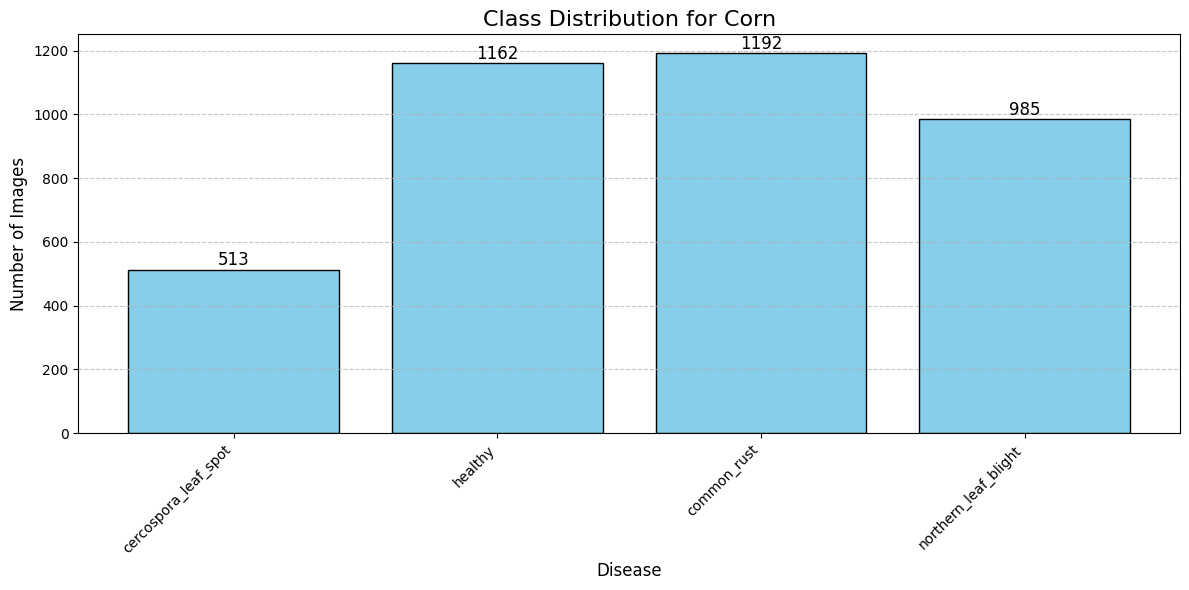

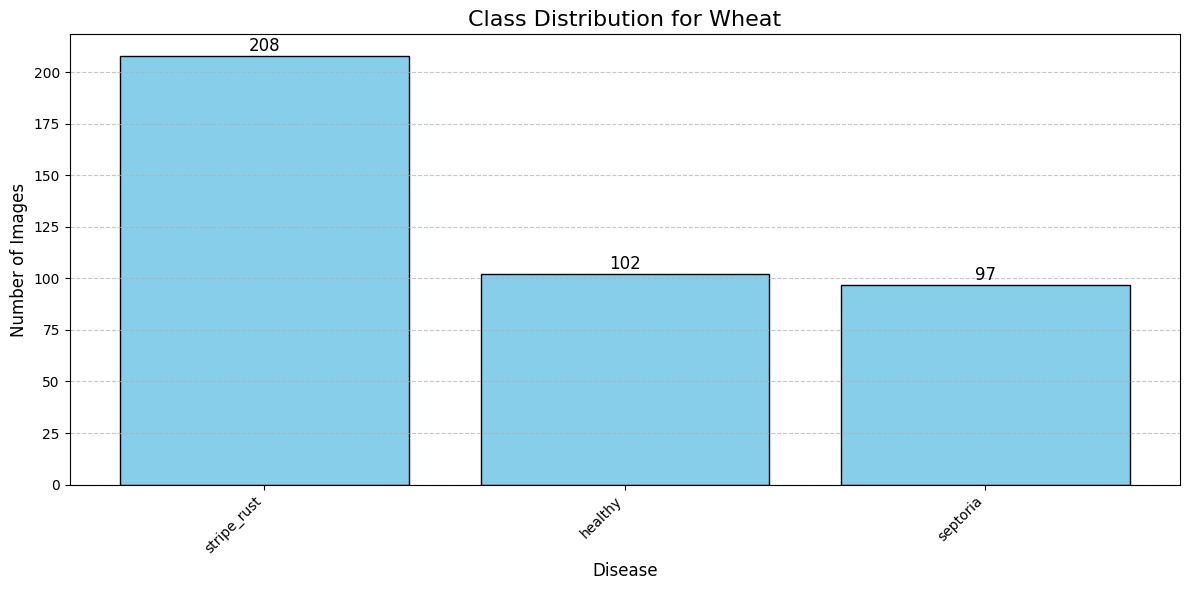

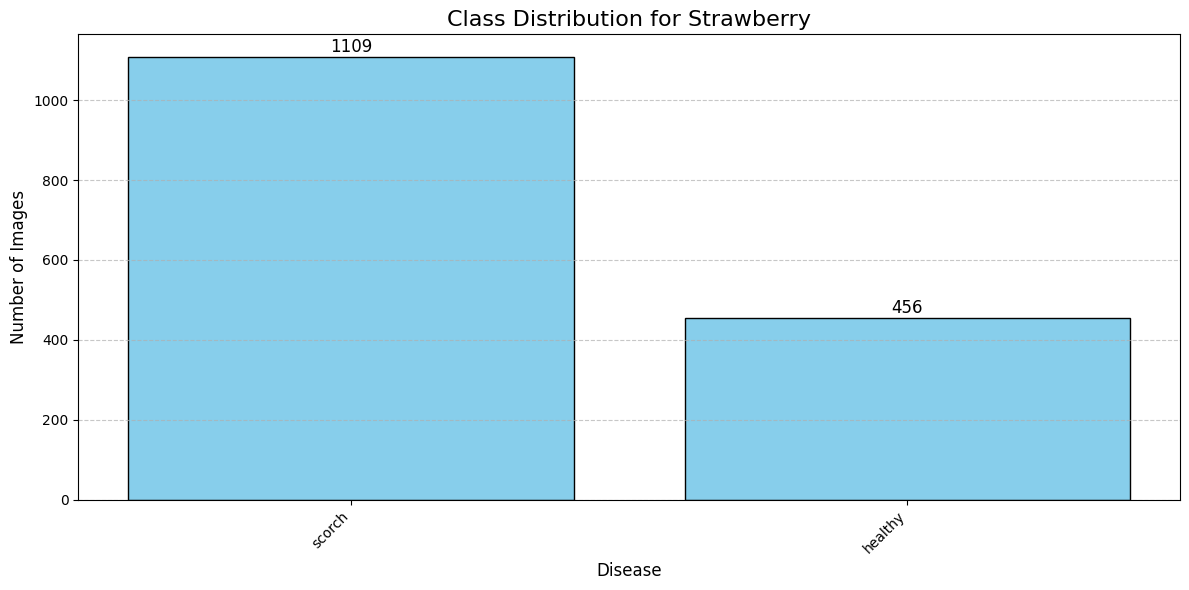

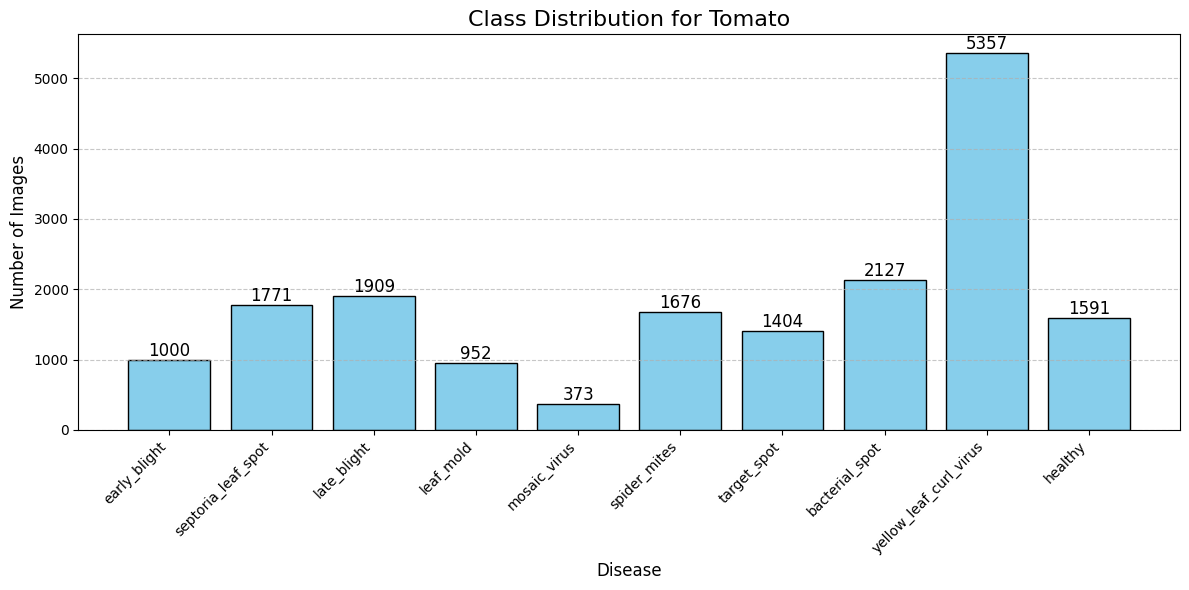

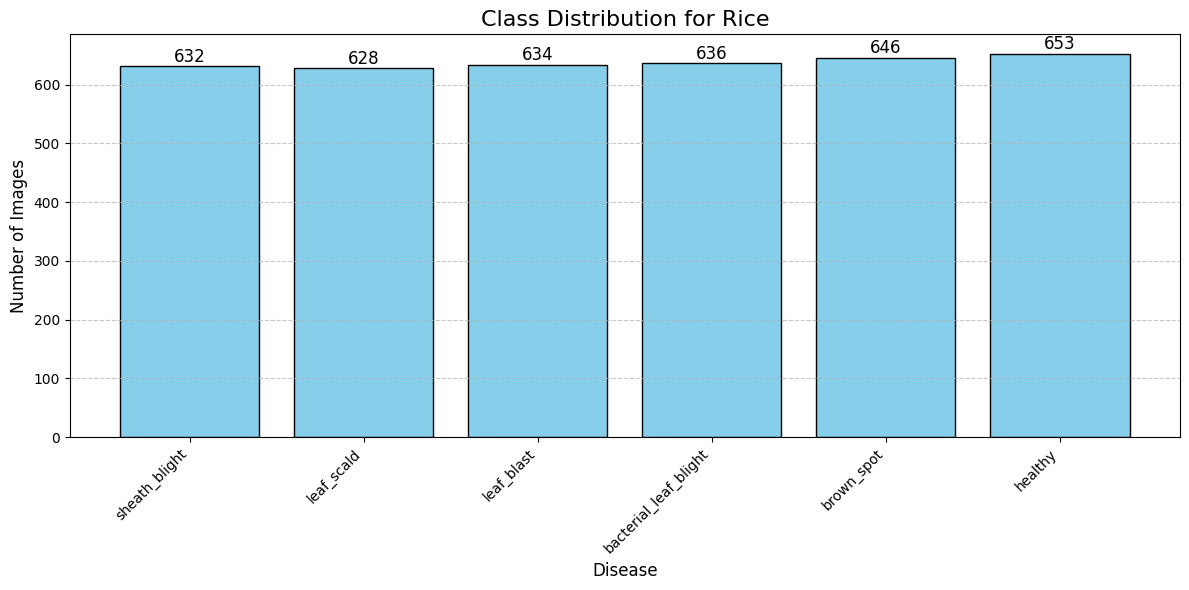

In [ ]:
import os
import matplotlib.pyplot as plt

# Helper function to count images in a directory
def count_images_in_dir(directory):
    valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}
    return sum(1 for file in os.listdir(directory) if os.path.splitext(file)[1].lower() in valid_extensions)

# Base directory (replace with your actual path if necessary)
base_dir = "dataset"

# Dictionary to store total images per crop
total_images = {}

# Loop through each crop and count total images
for crop in os.listdir(base_dir):
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir) and not crop.startswith("."):  # Exclude hidden directories
        # Initialize lists for diseases and their image counts
        diseases = []
        counts = []
        crop_total = 0

        # Loop through each disease within the crop and count images
        for disease in os.listdir(crop_dir):
            disease_dir = os.path.join(crop_dir, disease)
            if os.path.isdir(disease_dir) and not disease.startswith("."):  # Exclude hidden directories
                disease_count = count_images_in_dir(disease_dir)
                diseases.append(disease)
                counts.append(disease_count)
                crop_total += disease_count

        # Store total images for the crop
        total_images[crop] = crop_total

        # Plot bar chart for this crop
        plt.figure(figsize=(12, 6))
        bars = plt.bar(diseases, counts, color="skyblue", edgecolor="black")
        plt.title(f"Class Distribution for {crop.capitalize()}", fontsize=16)
        plt.xlabel("Disease", fontsize=12)
        plt.ylabel("Number of Images", fontsize=12)
        plt.xticks(rotation=45, ha="right")
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        # Display top values at the top of each bar
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha="center", va="bottom", fontsize=12)

        # Show the plot
        plt.tight_layout()
        plt.show()




Total images per crop:
Corn: 3852 images
Wheat: 407 images
Strawberry: 1565 images
Tomato: 18160 images
Rice: 3829 images


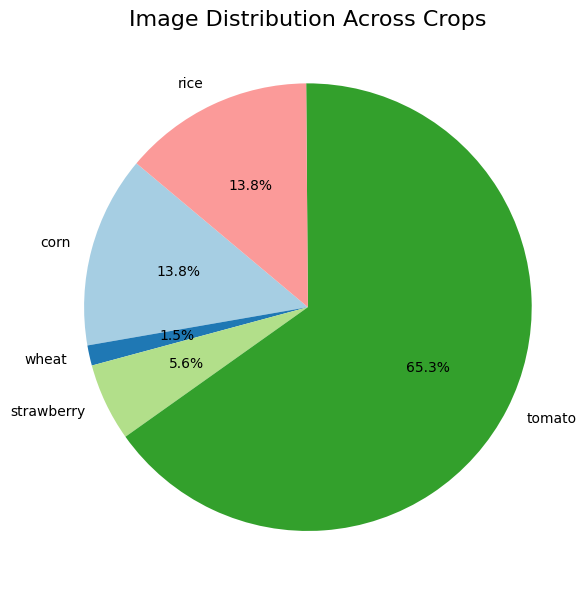

In [ ]:
# Print the total images per crop
print("Total images per crop:")
for crop, count in total_images.items():
    print(f"{crop.capitalize()}: {count} images")

# Plot pie chart for total images per crop
crop_names = list(total_images.keys())
crop_image_counts = list(total_images.values())

plt.figure(figsize=(6, 6))
plt.pie(crop_image_counts, labels=crop_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Image Distribution Across Crops", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


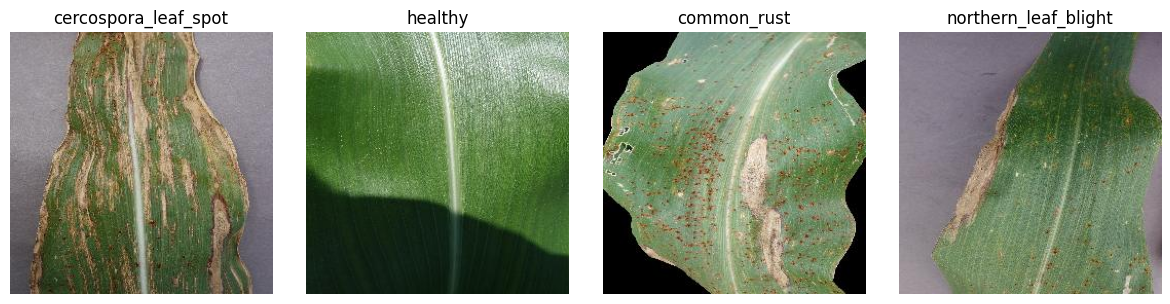

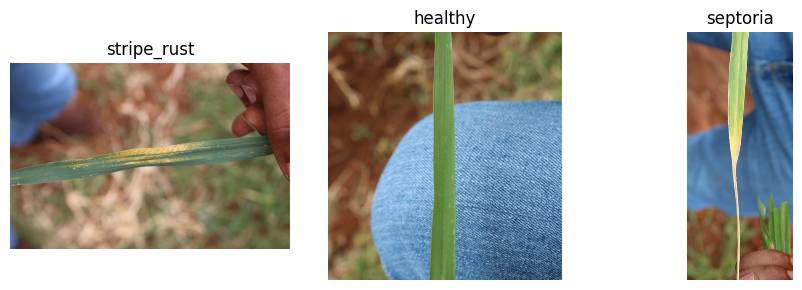

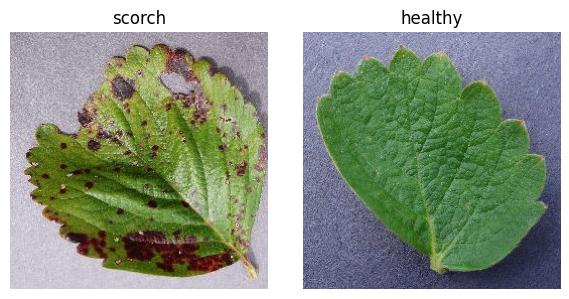

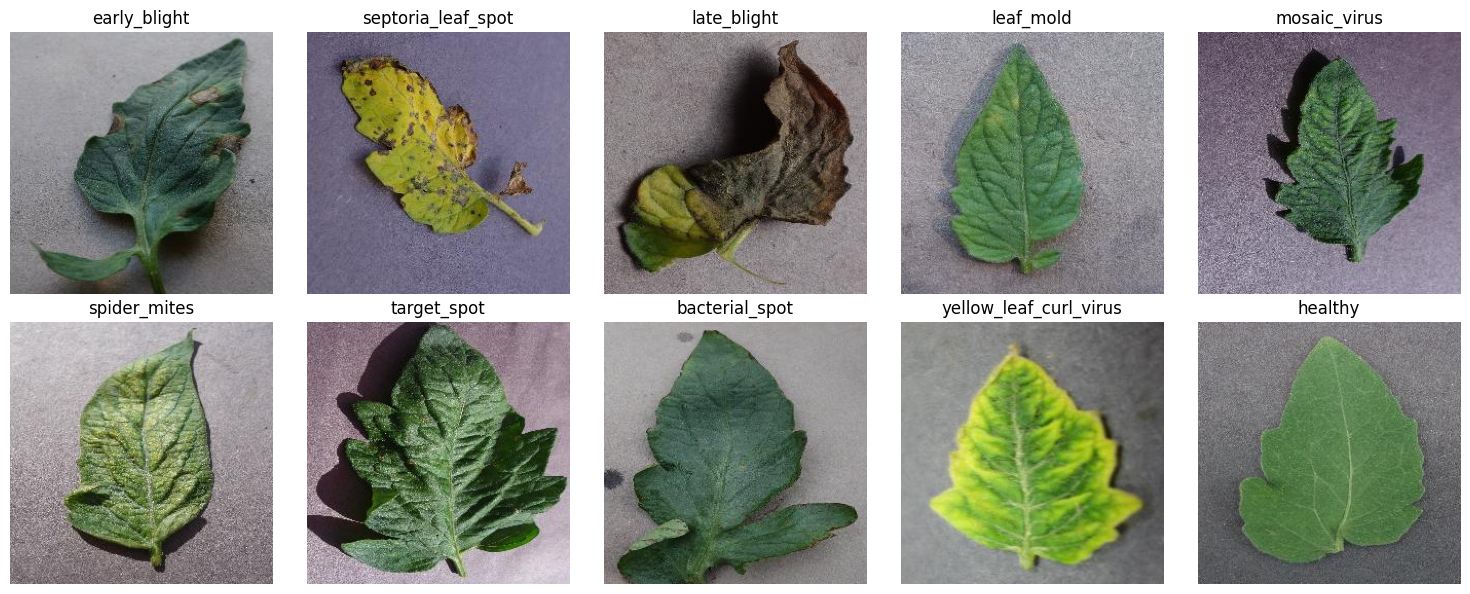

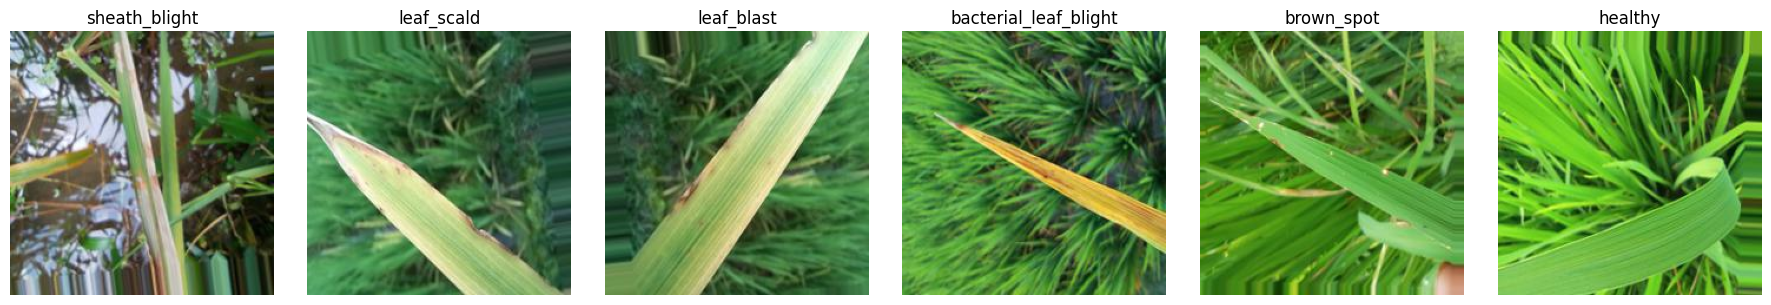

In [ ]:
import os
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

# Helper function to count images in a directory
def count_images_in_dir(directory):
    valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}
    return sum(1 for file in os.listdir(directory) if os.path.splitext(file)[1].lower() in valid_extensions)

# Base directory (replace with your actual path if necessary)
base_dir = "dataset"

# Loop through each crop and display one image per disease
for crop in os.listdir(base_dir):
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir) and not crop.startswith("."):  # Exclude hidden directories
        # Gather diseases and their image directories
        diseases = []
        disease_dirs = []
        for disease in os.listdir(crop_dir):
            disease_dir = os.path.join(crop_dir, disease)
            if os.path.isdir(disease_dir) and not disease.startswith("."):  # Exclude hidden directories
                diseases.append(disease)
                disease_dirs.append(disease_dir)

        # Check if crop is tomato, if so display 2 rows, 5 images per row
        if crop.lower() == "tomato":
            num_cols = 5  # Fixed number of columns for tomato
            num_rows = -(-len(diseases) // num_cols)  # Calculate rows using ceiling division
        else:
            # For other crops, only 1 row
            num_cols = len(diseases)
            num_rows = 1

        # Prepare to display images for the crop
        plt.figure(figsize=(num_cols * 3, num_rows * 3))  # Adjust the figure size

        # Display one image per disease
        for idx, disease_dir in enumerate(disease_dirs):
            # Get a list of image files in the disease directory
            image_files = [f for f in os.listdir(disease_dir) if os.path.splitext(f)[1].lower() in {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}]
            if not image_files:
                continue  # Skip if no images are found
            # Select one random image from the disease directory
            random_image = random.choice(image_files)
            image_path = os.path.join(disease_dir, random_image)

            # Load and display the image in a subplot
            plt.subplot(num_rows, num_cols, idx + 1)
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.title(diseases[idx])
            plt.axis('off')  # Hide axis

        plt.tight_layout()
        plt.show()


# Data cleaning

## Check for corrupt images

In [ ]:
import os
from PIL import Image

# Helper function to check for corrupt images
def check_and_remove_corrupt_images(directory):
    valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}
    corrupt_images = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if os.path.splitext(file)[1].lower() in valid_extensions:
                file_path = os.path.join(root, file)
                try:
                    # Try opening the image to check if it's corrupt
                    with Image.open(file_path) as img:
                        img.verify()  # Verify the image is not corrupt
                except (IOError, SyntaxError) as e:
                    corrupt_images.append(file_path)
                    os.remove(file_path)  # Remove the corrupt image

    return corrupt_images

# Base directory for your dataset (adjust if necessary)
base_dir = "dataset"

# List to store paths of corrupt images
corrupt_images = []

# Loop through each crop and check for corrupt images
for crop in os.listdir(base_dir):
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir) and not crop.startswith("."):  # Exclude hidden directories
        corrupt_images += check_and_remove_corrupt_images(crop_dir)

# Print the corrupt images if any were found
if corrupt_images:
    print(f"Found and removed {len(corrupt_images)} corrupt images:")
    for image in corrupt_images:
        print(image)
else:
    print("No corrupt images found.")


No corrupt images found.


## Handle class imbalances

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import numpy as np

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,          # Reduced range
    width_shift_range=0.2,      # Reduced range
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Base directory for the dataset
base_dir = "dataset"

# Directories of minority crops (wheat, strawberry)
minority_classes = ["wheat", "strawberry"]

# Function to apply augmentation
def augment_images(crop_dir, disease_dir, image_files):
    augmented_dir = os.path.join(disease_dir, "augmented")
    if not os.path.exists(augmented_dir):
        os.makedirs(augmented_dir)

    for image_file in image_files:
        image_path = os.path.join(disease_dir, image_file)
        try:
            # Load image
            img = Image.open(image_path)
            img = img.convert('RGB')  # Ensure image is in RGB format
            img = img.resize((256, 256))  # Resize to speed up augmentation
            img_array = np.array(img)
            img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for augmentation

            # Generate and save augmented images
            i = 0
            for batch in datagen.flow(img_array, save_to_dir=augmented_dir, save_prefix="aug_", save_format="jpeg"):
                i += 1
                if i >= 5:  # Limit to 5 augmented images per original image
                    break
        except Exception as e:
            print(f"Error processing image {image_file}: {e}")

# Apply augmentation to each disease in minority classes
for crop in minority_classes:
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir):
        for disease in os.listdir(crop_dir):
            disease_dir = os.path.join(crop_dir, disease)
            if os.path.isdir(disease_dir) and not disease.startswith("."):
                # Get all image files in the disease directory
                image_files = [
                    f for f in os.listdir(disease_dir)
                    if os.path.splitext(f)[1].lower() in {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}
                ]
                augment_images(crop_dir, disease_dir, image_files)

print("Data augmentation applied to minority classes.")


Data augmentation applied to minority classes.


In [ ]:
import os
import shutil

# Base directory of the dataset
base_dir = "dataset"

# List of minority classes
minority_classes = ["wheat", "strawberry"]

# Iterate over minority classes
for crop in minority_classes:
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir):
        for disease in os.listdir(crop_dir):
            disease_dir = os.path.join(crop_dir, disease)
            augmented_dir = os.path.join(disease_dir, "augmented")

            # Check if the augmented directory exists
            if os.path.exists(augmented_dir) and os.path.isdir(augmented_dir):
                # Move all files from augmented directory to the disease directory
                for file in os.listdir(augmented_dir):
                    file_path = os.path.join(augmented_dir, file)
                    if os.path.isfile(file_path):
                        shutil.move(file_path, disease_dir)

                # Remove the now-empty augmented directory
                os.rmdir(augmented_dir)

print("Augmented images moved to respective disease directories.")


Augmented images moved to respective disease directories.


In [ ]:
import os
import random

# Base directory of the dataset
base_dir = "dataset"

# Target percentage for tomato (e.g., 40% of total images)
target_percentage = 40.0

# Get total number of images in the dataset
def count_total_images(base_dir):
    total = 0
    for crop in os.listdir(base_dir):
        crop_dir = os.path.join(base_dir, crop)
        if os.path.isdir(crop_dir) and not crop.startswith("."):
            for disease in os.listdir(crop_dir):
                disease_dir = os.path.join(crop_dir, disease)
                if os.path.isdir(disease_dir) and not disease.startswith("."):
                    total += len([f for f in os.listdir(disease_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    return total

total_images = count_total_images(base_dir)
target_count = int((target_percentage / 100) * total_images)

# Get current image count for tomato
tomato_dir = os.path.join(base_dir, "tomato")
tomato_images = []
for disease in os.listdir(tomato_dir):
    disease_dir = os.path.join(tomato_dir, disease)
    if os.path.isdir(disease_dir):
        tomato_images += [os.path.join(disease_dir, f) for f in os.listdir(disease_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Calculate how many images to remove
current_tomato_count = len(tomato_images)
remove_count = max(0, current_tomato_count - target_count)

# Randomly select images to remove
if remove_count > 0:
    images_to_remove = random.sample(tomato_images, remove_count)
    for img_path in images_to_remove:
        os.remove(img_path)
    print(f"Removed {remove_count} images from tomato.")
else:
    print("No downsampling needed for tomato.")


Removed 3738 images from tomato.


### Tomato

In [ ]:
import os
import random
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters for oversampling
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Base directory for tomato crop
tomato_dir = "dataset/tomato"

# Disease classes to augment or downsample
disease_classes = {
    "early_blight": 813,
    "leaf_mold": 748,
    "mosaic_virus": 292,
    "yellow_leaf_curl_virus": 4208
}

# Augment or downsample diseases
for disease, count in disease_classes.items():
    disease_dir = os.path.join(tomato_dir, disease)

    # Oversample for underrepresented diseases
    if disease in ["early_blight", "leaf_mold", "mosaic_virus"]:
        image_files = [f for f in os.listdir(disease_dir) if os.path.splitext(f)[1].lower() in {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}]
        for image_file in image_files:
            image_path = os.path.join(disease_dir, image_file)
            img = Image.open(image_path)
            img = img.convert('RGB')  # Ensure image is in RGB format
            img_array = np.array(img)
            img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for augmentation

            # Create directory to save augmented images if it doesn't exist
            augmented_dir = disease_dir  # Save directly in the disease dir
            if not os.path.exists(augmented_dir):
                os.makedirs(augmented_dir)

            # Generate augmented images
            i = 0
            for batch in datagen.flow(img_array, save_to_dir=augmented_dir, save_prefix="aug_", save_format="jpeg"):
                i += 1
                if i >= 5:  # Limit to 10 augmented images per original image
                    break

    # Downsample for Yellow Leaf Curl Virus
    elif disease == "yellow_leaf_curl_virus":
        image_files = [f for f in os.listdir(disease_dir) if os.path.splitext(f)[1].lower() in {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}]
        # Downsample to match other diseases (let's target a number like 1400 images)
        target_count = 1400
        if len(image_files) > target_count:
            selected_images = random.sample(image_files, target_count)
            for image_file in selected_images:
                # Keep the selected images in the directory, remove others
                pass  # No need to delete since they are already in the target set.

print("Oversampling and downsampling completed.")


Oversampling and downsampling completed.


In [ ]:
import os
import random
from PIL import Image

# Base directory for tomato crop
tomato_dir = "dataset/tomato"

# Disease classes to downsample and their target ranges
disease_classes_to_downsample = {
    "early_blight": (1500, 2000),  # Range for early blight
    "yellow_leaf_curl_virus": (1500, 2000),  # Range for yellow leaf curl virus
    "leaf_mold": (1500, 2000)  # Range for leaf mold
}

# Downsample diseases
for disease, (min_count, max_count) in disease_classes_to_downsample.items():
    disease_dir = os.path.join(tomato_dir, disease)

    # Get all image files in the disease directory
    image_files = [f for f in os.listdir(disease_dir) if os.path.splitext(f)[1].lower() in {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}]

    # Randomly downsample within the specified range
    target_count = random.randint(min_count, max_count)
    if len(image_files) > target_count:
        selected_images = random.sample(image_files, target_count)
        for image_file in image_files:
            # Remove images that were not selected
            if image_file not in selected_images:
                image_path = os.path.join(disease_dir, image_file)
                os.remove(image_path)

        print(f"Downsampled {disease} to {target_count} images.")

print("Downsampling completed.")


Downsampled early_blight to 1860 images.
Downsampled yellow_leaf_curl_virus to 1838 images.
Downsampled leaf_mold to 1514 images.
Downsampling completed.


### Corn

In [ ]:
import os
import random
from PIL import Image

# Base directory for corn crop
corn_dir = "dataset/corn"

# Disease classes to oversample, with their target ranges
disease_classes_to_oversample = {
    "cercospora_leaf_spot": (900, 1100),  # Slight oversampling range for Cercospora
}

# Oversample Cercospora
for disease, (min_count, max_count) in disease_classes_to_oversample.items():
    disease_dir = os.path.join(corn_dir, disease)

    # Get all image files in the disease directory
    image_files = [f for f in os.listdir(disease_dir) if os.path.splitext(f)[1].lower() in {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}]

    # Randomly oversample within the specified range
    target_count = random.randint(min_count, max_count)
    if len(image_files) < target_count:
        # Calculate how many more images are needed
        additional_images_needed = target_count - len(image_files)

        # Create augmented images but limit the number based on additional_images_needed
        for image_file in image_files:
            image_path = os.path.join(disease_dir, image_file)
            img = Image.open(image_path)
            img = img.convert('RGB')  # Ensure image is in RGB format

            # Generate and save augmented images directly in the disease directory
            for i in range(additional_images_needed):
                new_image_path = os.path.join(disease_dir, f"{os.path.splitext(image_file)[0]}_aug_{i}.jpg")
                img.save(new_image_path)

                # If we’ve reached the target number, stop oversampling
                if i + 1 >= additional_images_needed:
                    break
        print(f"Oversampled {disease} to {target_count} images.")

print("Oversampling completed for corn crop.")


Oversampled cercospora_leaf_spot to 1000 images.
Oversampling completed for corn crop.


In [ ]:
import os
import random
import shutil

# Base directory for the corn crop
corn_dir = "dataset/corn"

# Disease classes and their target ranges
disease_classes_to_downsample = {
    "cercospora_leaf_spot": (1000, 1200),  # Target range for Cercospora
}

# Downsample Cercospora to the target range
for disease, (min_count, max_count) in disease_classes_to_downsample.items():
    disease_dir = os.path.join(corn_dir, disease)

    # Get all image files in the disease directory
    image_files = [f for f in os.listdir(disease_dir) if os.path.splitext(f)[1].lower() in {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}]

    # If the number of images exceeds the max count, we downsample
    if len(image_files) > max_count:
        # Randomly select images to keep within the target range
        images_to_keep = random.sample(image_files, max_count)

        # Copy the selected images back to the disease directory (do not remove them)
        for image_file in image_files:
            image_path = os.path.join(disease_dir, image_file)
            if image_file not in images_to_keep and os.path.isfile(image_path):
                os.remove(image_path)  # Remove images that are not in the selected set

        print(f"Downsampled {disease} to {max_count} images.")

print("Downsampling completed for corn crop.")


Downsampled cercospora_leaf_spot to 1200 images.
Downsampling completed for corn crop.


### Wheat

In [ ]:
import os
import random
import shutil

# Base directory for the wheat crop
wheat_dir = "dataset/wheat"

# Disease classes and their target ranges for downsampling
disease_classes_to_downsample = {
    "septoria": (900, 1200),  # Target range for Septoria
    "healthy": (900, 1200),   # Target range for Healthy
}

# Downsample the specified diseases to the target range
for disease, (min_count, max_count) in disease_classes_to_downsample.items():
    disease_dir = os.path.join(wheat_dir, disease)

    # Get all image files in the disease directory
    image_files = [f for f in os.listdir(disease_dir) if os.path.splitext(f)[1].lower() in {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}]

    current_count = len(image_files)

    if current_count > max_count:
        print(f"Downsampling {disease} as it has {current_count} images, exceeding the target range.")

        # Calculate how many images to remove
        images_to_remove = current_count - max_count

        # Randomly select images to remove
        images_to_remove_list = random.sample(image_files, images_to_remove)

        # Remove the selected images
        for image in images_to_remove_list:
            image_path = os.path.join(disease_dir, image)
            os.remove(image_path)

        print(f"Downsampled {disease} to {max_count} images.")
    else:
        print(f"{disease} is within the target range.")

print("Downsampling completed for wheat crop.")


septoria is within the target range.
healthy is within the target range.
Downsampling completed for wheat crop.


In [ ]:
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import uuid  # To generate unique file names

# Base directory for the wheat crop
wheat_dir = "dataset/wheat"

# Disease classes and their target ranges for oversampling
disease_classes_to_oversample = {
    "healthy": (900, 1200),   # Target range for Healthy
    "septoria": (900, 1200),  # Target range for Septoria
}

# Function to oversample images using augmentation
def oversample_images(input_dir, target_count):
    image_files = [f for f in os.listdir(input_dir) if os.path.splitext(f)[1].lower() in {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}]
    current_count = len(image_files)

    if current_count >= target_count:
        print(f"No oversampling needed for {input_dir}.")
        return

    # Apply augmentation until the target count is met
    while len(os.listdir(input_dir)) < target_count:
        img_path = os.path.join(input_dir, random.choice(image_files))
        img = tf.keras.utils.load_img(img_path)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        # Generate augmented images and save them with a unique name
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=input_dir, save_prefix="aug_", save_format="jpg"):
            # Break after generating one image to avoid continuous augmentation
            break
            if len(os.listdir(input_dir)) >= target_count:
                break

# Oversample the specified diseases
for disease, (min_count, max_count) in disease_classes_to_oversample.items():
    disease_dir = os.path.join(wheat_dir, disease)
    print(f"Oversampling {disease} to target count {max_count} images.")
    oversample_images(disease_dir, max_count)

print("Oversampling completed for wheat crop.")


Oversampling healthy to target count 1200 images.
Oversampling septoria to target count 1200 images.
Oversampling completed for wheat crop.


### Strawberry

In [ ]:
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np

# Base directory for the strawberry crop
strawberry_dir = "dataset/strawberry"

# Disease classes and their target ranges for sampling
disease_classes_to_balance = {
    "scorch": (1300, 1500),  # Target range for Scorch (oversampling to random value)
    "healthy": (1300, 1500), # Target range for Healthy (oversampling to random value)
}

# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Balance the specified diseases
for disease, (min_count, max_count) in disease_classes_to_balance.items():
    disease_dir = os.path.join(strawberry_dir, disease)

    # Get all image files in the disease directory
    image_files = [f for f in os.listdir(disease_dir) if os.path.splitext(f)[1].lower() in {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}]

    current_count = len(image_files)

    if current_count > max_count:
        # Downsampling for diseases exceeding max count
        print(f"Downsampling {disease} as it has {current_count} images, exceeding the target range.")

        # Calculate how many images to remove
        images_to_remove = current_count - max_count

        # Randomly select images to remove
        images_to_remove_list = random.sample(image_files, images_to_remove)

        # Remove the selected images
        for image in images_to_remove_list:
            image_path = os.path.join(disease_dir, image)
            os.remove(image_path)

        print(f"Downsampled {disease} to {max_count} images.")

    elif current_count < min_count:
        # Oversampling for diseases with less than the target minimum
        oversample_count = random.randint(min_count, max_count)
        print(f"Oversampling {disease} to {oversample_count} images, current count is {current_count}.")

        # Calculate how many images to add
        images_to_add = oversample_count - current_count

        # Randomly select images to augment
        images_to_augment_list = random.sample(image_files, images_to_add)

        # Apply augmentation using ImageDataGenerator
        for image_name in images_to_augment_list:
            image_path = os.path.join(disease_dir, image_name)
            img = Image.open(image_path)
            img = img.convert('RGB')  # Ensure image is in RGB format
            img_array = np.array(img)
            img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for augmentation

            # Apply augmentation and save the augmented images
            i = 0
            for batch in datagen.flow(img_array, save_to_dir=disease_dir, save_prefix="aug_", save_format="jpeg"):
                i += 1
                if i >= 5:  # Limit the number of augmented images per original image
                    break

        print(f"Oversampled {disease} to {oversample_count} images using augmentation.")
    else:
        print(f"{disease} is within the target range.")

print("Balancing completed for strawberry crop.")


Downsampling scorch as it has 5361 images, exceeding the target range.
Downsampled scorch to 1500 images.
Downsampling healthy as it has 2494 images, exceeding the target range.
Downsampled healthy to 1500 images.
Balancing completed for strawberry crop.


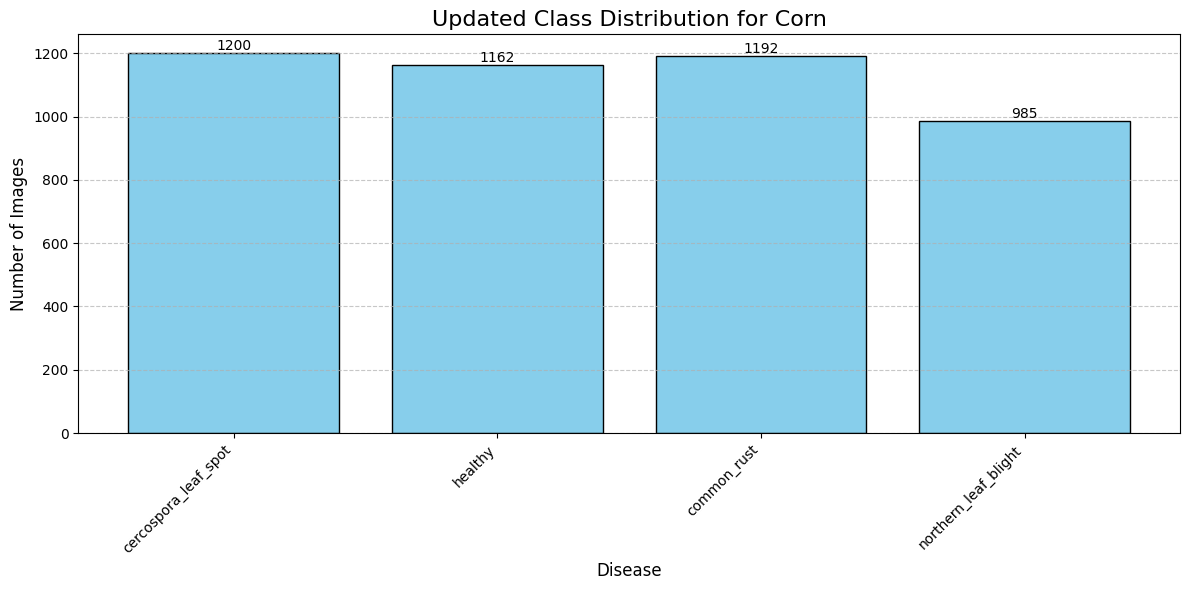

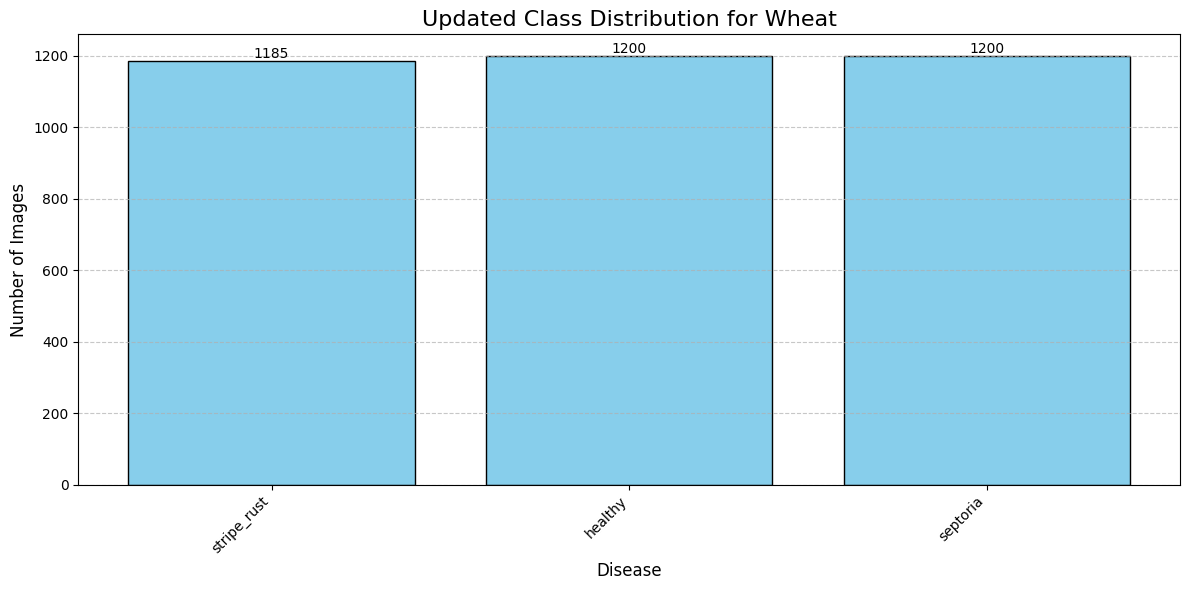

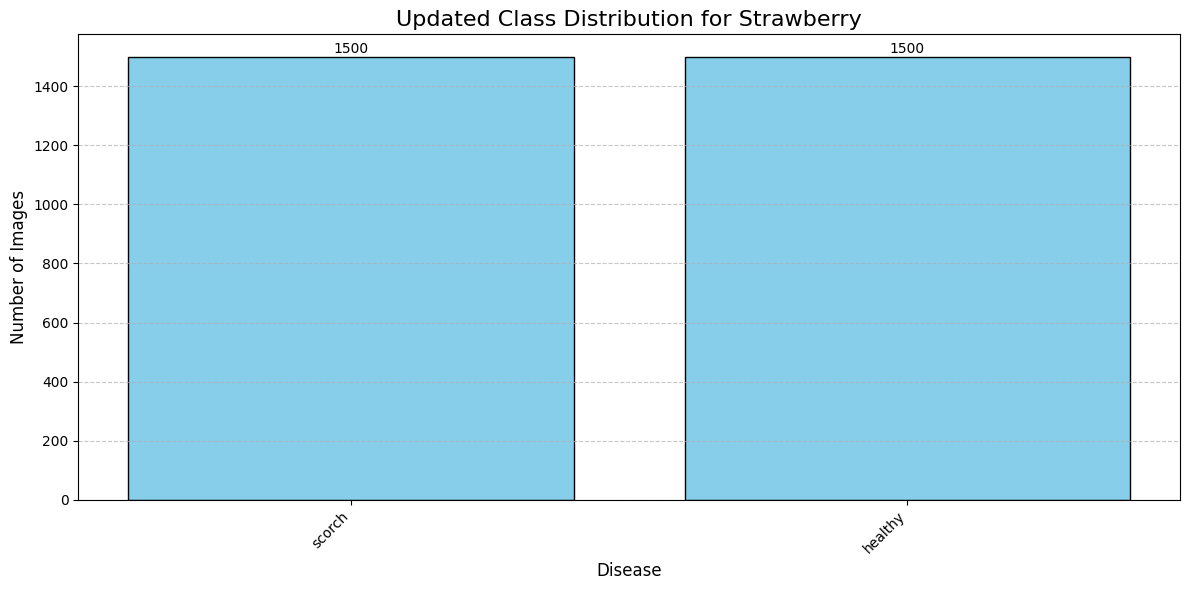

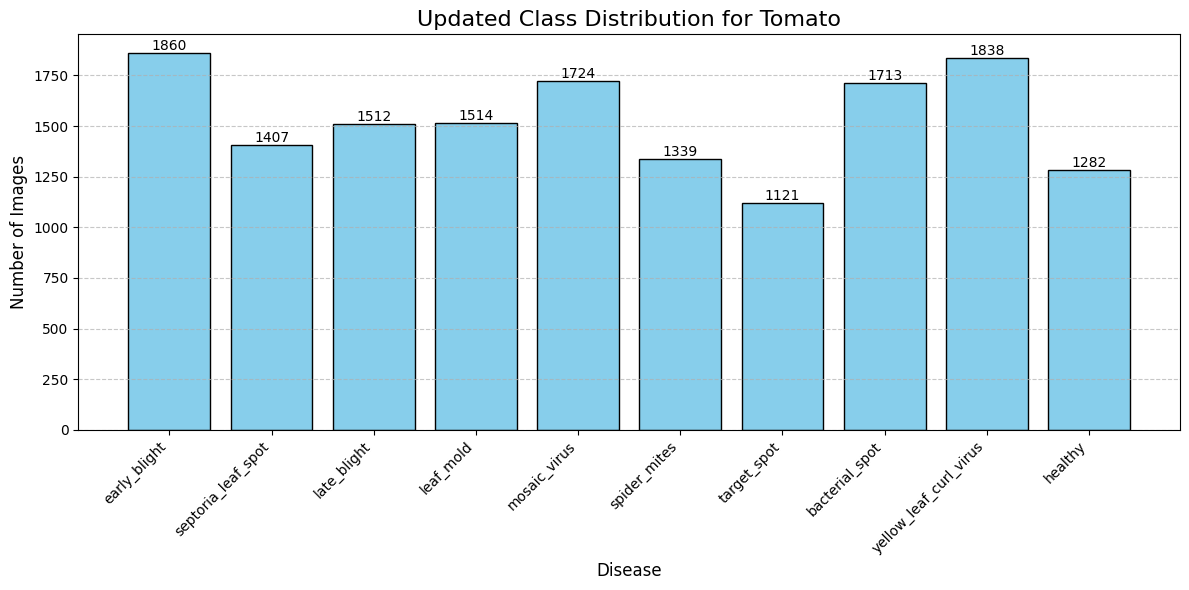

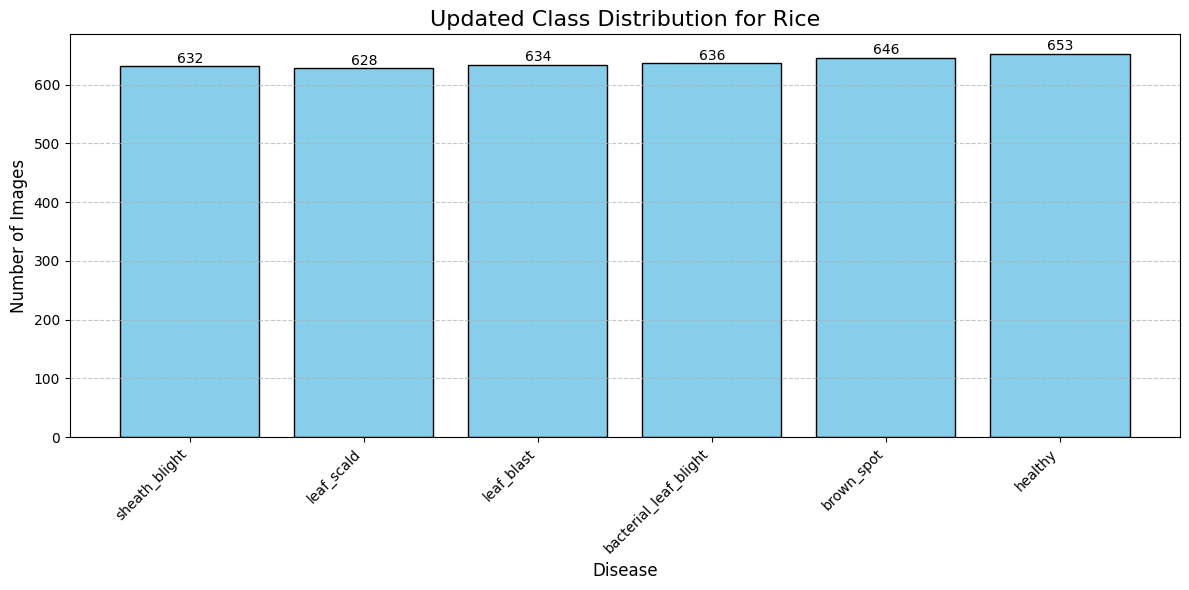

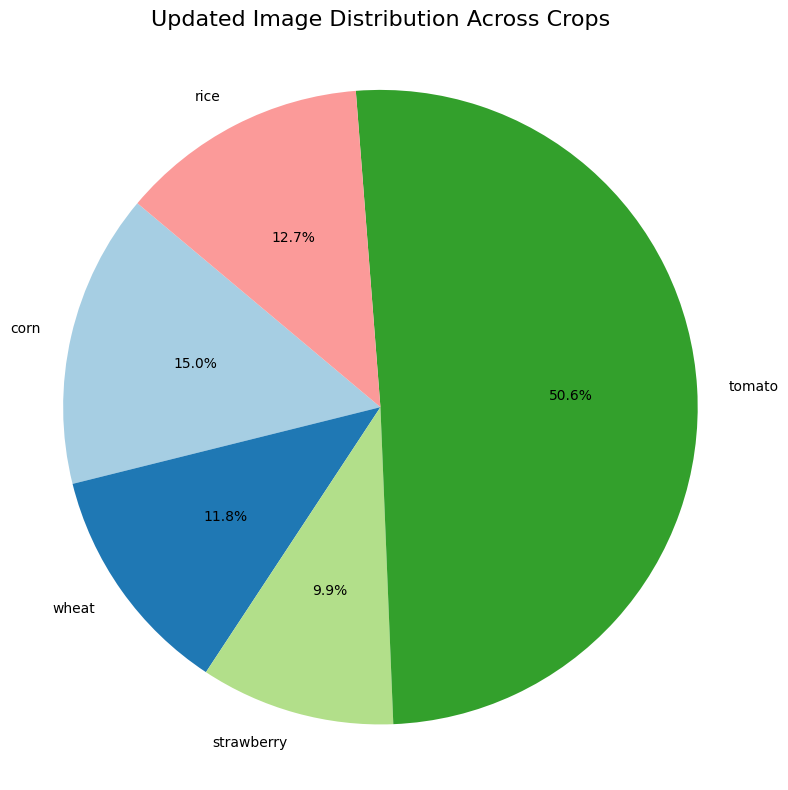

In [ ]:
import os
import matplotlib.pyplot as plt

# Helper function to count images in a directory (including subdirectories)
def count_images_in_dir_recursive(directory):
    valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}
    count = 0
    for root, _, files in os.walk(directory):
        count += sum(1 for file in files if os.path.splitext(file)[1].lower() in valid_extensions)
    return count

# Base directory
base_dir = "dataset"

# Dictionary to store updated total images per crop
updated_total_images = {}

# Loop through each crop and plot updated class distributions
for crop in os.listdir(base_dir):
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir) and not crop.startswith("."):  # Exclude hidden directories
        # Gather disease names and image counts
        diseases = []
        counts = []
        crop_total = 0

        for disease in os.listdir(crop_dir):
            disease_dir = os.path.join(crop_dir, disease)
            if os.path.isdir(disease_dir) and not disease.startswith("."):  # Exclude hidden directories
                count = count_images_in_dir_recursive(disease_dir)  # Recursive count
                diseases.append(disease)
                counts.append(count)
                crop_total += count

        updated_total_images[crop] = crop_total

        # Plot bar chart for this crop
        plt.figure(figsize=(12, 6))
        bars = plt.bar(diseases, counts, color="skyblue", edgecolor="black")
        plt.title(f"Updated Class Distribution for {crop.capitalize()}", fontsize=16)
        plt.xlabel("Disease", fontsize=12)
        plt.ylabel("Number of Images", fontsize=12)
        plt.xticks(rotation=45, ha="right")
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        # Display top values at the top of each bar
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha="center", va="bottom", fontsize=10)

        plt.tight_layout()
        plt.show()

# Plot pie chart for total images per crop
crop_names = list(updated_total_images.keys())
crop_image_counts = list(updated_total_images.values())

plt.figure(figsize=(8, 8))
plt.pie(crop_image_counts, labels=crop_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Updated Image Distribution Across Crops", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


# Preprocessing

## Augmentation

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

# Base directories for crops
tomato_dir = "/content/dataset/tomato"
corn_dir = "/content/dataset/corn"

# Augmentation settings
augmenter = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)

# Class augmentation counts for tomato and corn
augmentation_counts = {
    tomato_dir: {
        "spider_mites": 478,
        "septoria_leaf_spot": 413,
        "yellow_leaf_curl_virus": 292,
        "healthy": 538,
        "bacterial_spot": 112,
        "target_spot": 698,
        "late_blight": 264,
        "mosaic_virus": 77,
    },
    corn_dir: {
        "northern_leaf_blight": 215,
        "healthy": 38,
        "common_rust": 8,
    },
}

def augment_images(crop_dir, class_name, target_count):
    input_dir = os.path.join(crop_dir, class_name)

    # Load images from the class folder
    images = [os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith(".jpg")]

    num_augmented = 0
    for img_path in tqdm(images, desc=f"Augmenting {class_name}"):
        if num_augmented >= target_count:
            break
        # Load the image and reshape
        img = tf.keras.preprocessing.image.load_img(img_path)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for the generator

        # Generate augmented images
        for batch in augmenter.flow(img_array, batch_size=1, save_to_dir=input_dir, save_prefix="aug", save_format="jpg"):
            num_augmented += 1
            if num_augmented >= target_count:
                break

# Augment images for each crop and class
for crop_dir, classes in augmentation_counts.items():
    for class_name, count in classes.items():
        print(f"Augmenting {crop_dir} - {class_name} with {count} images")
        augment_images(crop_dir, class_name, count)

print("Augmentation complete!")


Augmenting /content/dataset/tomato - spider_mites with 478 images


Augmenting spider_mites: 0it [00:00, ?it/s]


Augmenting /content/dataset/tomato - septoria_leaf_spot with 413 images


Augmenting septoria_leaf_spot: 0it [00:00, ?it/s]


Augmenting /content/dataset/tomato - yellow_leaf_curl_virus with 292 images


Augmenting yellow_leaf_curl_virus: 0it [00:00, ?it/s]


Augmenting /content/dataset/tomato - healthy with 538 images


Augmenting healthy: 100%|██████████| 1/1 [00:06<00:00,  6.57s/it]


Augmenting /content/dataset/tomato - bacterial_spot with 112 images


Augmenting bacterial_spot: 0it [00:00, ?it/s]


Augmenting /content/dataset/tomato - target_spot with 698 images


Augmenting target_spot: 0it [00:00, ?it/s]


Augmenting /content/dataset/tomato - late_blight with 264 images


Augmenting late_blight:   1%|          | 1/123 [00:03<06:39,  3.28s/it]


Augmenting /content/dataset/tomato - mosaic_virus with 77 images


Augmenting mosaic_virus: 0it [00:00, ?it/s]


Augmenting /content/dataset/corn - northern_leaf_blight with 215 images


Augmenting northern_leaf_blight:   1%|          | 1/115 [00:02<04:57,  2.61s/it]


Augmenting /content/dataset/corn - healthy with 38 images


Augmenting healthy:   0%|          | 1/1141 [00:00<08:51,  2.14it/s]


Augmenting /content/dataset/corn - common_rust with 8 images


Augmenting common_rust: 0it [00:00, ?it/s]

Augmentation complete!


## Size Standardization

In [ ]:
from PIL import Image

# Desired dimensions for resizing
target_size = (224, 224)

# Base directory for the dataset
base_dir = "dataset"

# Resize all images in the dataset
for crop in os.listdir(base_dir):
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir):
        for disease in os.listdir(crop_dir):
            disease_dir = os.path.join(crop_dir, disease)
            if os.path.isdir(disease_dir):
                for image_file in os.listdir(disease_dir):
                    image_path = os.path.join(disease_dir, image_file)
                    try:
                        with Image.open(image_path) as img:
                            img = img.convert("RGB")  # Ensure RGB mode
                            img = img.resize(target_size, Image.Resampling.LANCZOS)  # Updated resizing method
                            img.save(image_path)
                    except Exception as e:
                        print(f"Error resizing image: {image_path} -> {e}")

print("Size standardization completed.")


Size standardization completed.


## Normalization

In [ ]:
import numpy as np
from PIL import Image

# Base directory for the dataset
base_dir = "dataset"

# Normalize pixel values to the range [0, 1]
def normalize_image(image):
    return np.array(image) / 255.0

# Normalize all images in the dataset
for crop in os.listdir(base_dir):
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir):
        for disease in os.listdir(crop_dir):
            disease_dir = os.path.join(crop_dir, disease)
            if os.path.isdir(disease_dir):
                for image_file in os.listdir(disease_dir):
                    image_path = os.path.join(disease_dir, image_file)
                    try:
                        with Image.open(image_path) as img:
                            img = img.convert("RGB")  # Ensure RGB mode
                            normalized_img = normalize_image(img)
                            normalized_img = (normalized_img * 255).astype(np.uint8)  # Convert back to uint8
                            Image.fromarray(normalized_img).save(image_path)  # Save normalized image
                    except Exception as e:
                        print(f"Error normalizing image: {image_path} -> {e}")

print("Normalization completed.")


Normalization completed.


## Label Encoding

In [ ]:
import json

# Base directory for the dataset
base_dir = "dataset"

# Create a mapping for crops and diseases
crop_label_map = {}
disease_label_map = {}
crop_counter = 0
disease_counter = 0

# Generate labels for crops and diseases
for crop in os.listdir(base_dir):
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir):
        if crop not in crop_label_map:
            crop_label_map[crop] = crop_counter
            crop_counter += 1
        for disease in os.listdir(crop_dir):
            disease_dir = os.path.join(crop_dir, disease)
            if os.path.isdir(disease_dir):
                if disease not in disease_label_map:
                    disease_label_map[disease] = disease_counter
                    disease_counter += 1

# Save the mappings as JSON files for future reference
with open("crop_labels.json", "w") as crop_file:
    json.dump(crop_label_map, crop_file, indent=4)
with open("disease_labels.json", "w") as disease_file:
    json.dump(disease_label_map, disease_file, indent=4)

print("Label encoding completed.")
print(f"Crop Labels: {crop_label_map}")
print(f"Disease Labels: {disease_label_map}")

Label encoding completed.
Crop Labels: {'corn': 0, 'wheat': 1, 'strawberry': 2, 'tomato': 3, 'rice': 4}
Disease Labels: {'cercospora_leaf_spot': 0, 'healthy': 1, 'common_rust': 2, 'northern_leaf_blight': 3, 'stripe_rust': 4, 'septoria': 5, 'scorch': 6, 'early_blight': 7, 'septoria_leaf_spot': 8, 'late_blight': 9, 'leaf_mold': 10, 'mosaic_virus': 11, 'spider_mites': 12, 'target_spot': 13, 'bacterial_spot': 14, 'yellow_leaf_curl_virus': 15, 'sheath_blight': 16, 'leaf_scald': 17, 'leaf_blast': 18, 'bacterial_leaf_blight': 19, 'brown_spot': 20}


## Outlier detection

In [ ]:
from PIL import Image

# Base directory for the dataset
base_dir = "dataset"

# Threshold for image dimensions (e.g., extremely small or large images)
min_dimension = 100  # Minimum width/height
max_dimension = 2000  # Maximum width/height

# List to track outliers
outliers = []

# Check each image in the dataset
for crop in os.listdir(base_dir):
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir):
        for disease in os.listdir(crop_dir):
            disease_dir = os.path.join(crop_dir, disease)
            if os.path.isdir(disease_dir):
                for image_name in os.listdir(disease_dir):
                    image_path = os.path.join(disease_dir, image_name)
                    try:
                        with Image.open(image_path) as img:
                            width, height = img.size
                            if width < min_dimension or height < min_dimension or width > max_dimension or height > max_dimension:
                                outliers.append(image_path)
                    except Exception as e:
                        print(f"Error processing image {image_path}: {e}")

# Display outliers
if outliers:
    print(f"Found {len(outliers)} outliers:")
    for outlier in outliers:
        print(outlier)
else:
    print("No outliers detected.")

No outliers detected.


## Directory verification

In [ ]:
import os

# Base directory for the dataset
base_dir = "dataset"

# Verify dataset structure
for crop in os.listdir(base_dir):
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir):
        print(f"Crop: {crop}")
        for disease in os.listdir(crop_dir):
            disease_dir = os.path.join(crop_dir, disease)
            if os.path.isdir(disease_dir):
                image_count = len([f for f in os.listdir(disease_dir) if os.path.isfile(os.path.join(disease_dir, f))])
                print(f"  Disease: {disease}, Images: {image_count}")
            else:
                print(f"  Warning: {disease} is not a directory!")
    else:
        print(f"Warning: {crop} is not a directory!")


Crop: corn
  Disease: cercospora_leaf_spot, Images: 1200
  Disease: healthy, Images: 1200
  Disease: common_rust, Images: 1192
  Disease: northern_leaf_blight, Images: 1199
Crop: wheat
  Disease: stripe_rust, Images: 1185
  Disease: healthy, Images: 1200
  Disease: septoria, Images: 1200
Crop: strawberry
  Disease: scorch, Images: 1500
  Disease: healthy, Images: 1500
Crop: tomato
  Disease: early_blight, Images: 1860
  Disease: septoria_leaf_spot, Images: 1407
  Disease: late_blight, Images: 1772
  Disease: leaf_mold, Images: 1514
  Disease: mosaic_virus, Images: 1724
  Disease: spider_mites, Images: 1339
  Disease: target_spot, Images: 1121
  Disease: bacterial_spot, Images: 1713
  Disease: yellow_leaf_curl_virus, Images: 1838
  Disease: healthy, Images: 1801
Crop: rice
  Disease: sheath_blight, Images: 632
  Disease: leaf_scald, Images: 628
  Disease: leaf_blast, Images: 634
  Disease: bacterial_leaf_blight, Images: 636
  Disease: brown_spot, Images: 646
  Disease: healthy, Images: 

## Dataset splitting

In [ ]:
import os
import random
import shutil

# Base directory for the dataset
base_dir = "dataset"
# Output directories for the splits
train_dir = "split_data/train"
val_dir = "split_data/val"
test_dir = "split_data/test"

# Create directories for train, validation, and test splits
for split_dir in [train_dir, val_dir, test_dir]:
    if not os.path.exists(split_dir):
        os.makedirs(split_dir)

# Function to split the dataset
def split_dataset(crop, disease, disease_dir, split_dir):
    # List all image files in the disease directory
    image_files = [f for f in os.listdir(disease_dir) if os.path.isfile(os.path.join(disease_dir, f))]

    # Shuffle images to ensure randomness
    random.shuffle(image_files)

    # Split images into 70% train, 15% validation, and 15% test
    total_images = len(image_files)
    train_count = int(total_images * 0.7)
    val_count = int(total_images * 0.15)

    # Paths to move the images
    for idx, image in enumerate(image_files):
        src_path = os.path.join(disease_dir, image)

        if idx < train_count:
            dst_dir = os.path.join(split_dir, "train", crop, disease)
        elif idx < train_count + val_count:
            dst_dir = os.path.join(split_dir, "val", crop, disease)
        else:
            dst_dir = os.path.join(split_dir, "test", crop, disease)

        # Create destination directories if they don't exist
        if not os.path.exists(dst_dir):
            os.makedirs(dst_dir)

        dst_path = os.path.join(dst_dir, image)
        shutil.copy(src_path, dst_path)  # Copy the image

# Iterate through each crop and disease directory to split data
for crop in os.listdir(base_dir):
    crop_dir = os.path.join(base_dir, crop)
    if os.path.isdir(crop_dir):
        for disease in os.listdir(crop_dir):
            disease_dir = os.path.join(crop_dir, disease)
            if os.path.isdir(disease_dir):
                split_dataset(crop, disease, disease_dir, "split_data")

print("Dataset splitting is complete.")


Dataset splitting is complete.


In [ ]:
import os

# Directory to verify
split_base_dir = "split_data"

# Function to check image count per split
def check_split_distribution(split_dir):
    print(f"\nChecking image distribution in: {split_dir}")
    for crop in os.listdir(split_dir):
        crop_dir = os.path.join(split_dir, crop)
        if os.path.isdir(crop_dir):
            for disease in os.listdir(crop_dir):
                disease_dir = os.path.join(crop_dir, disease)
                if os.path.isdir(disease_dir):
                    total_images = sum([len(files) for r, d, files in os.walk(disease_dir)])
                    print(f"  {crop} - {disease}: {total_images} images")

# Verify distribution for train, validation, and test splits
check_split_distribution(os.path.join(split_base_dir, "train"))
check_split_distribution(os.path.join(split_base_dir, "val"))
check_split_distribution(os.path.join(split_base_dir, "test"))



Checking image distribution in: split_data/train
  corn - cercospora_leaf_spot: 840 images
  corn - healthy: 840 images
  corn - common_rust: 834 images
  corn - northern_leaf_blight: 839 images
  wheat - stripe_rust: 829 images
  wheat - healthy: 840 images
  wheat - septoria: 840 images
  strawberry - scorch: 1050 images
  strawberry - healthy: 1050 images
  tomato - early_blight: 1302 images
  tomato - septoria_leaf_spot: 984 images
  tomato - late_blight: 1240 images
  tomato - leaf_mold: 1059 images
  tomato - mosaic_virus: 1206 images
  tomato - spider_mites: 937 images
  tomato - target_spot: 784 images
  tomato - bacterial_spot: 1199 images
  tomato - yellow_leaf_curl_virus: 1286 images
  tomato - healthy: 1260 images
  rice - sheath_blight: 442 images
  rice - leaf_scald: 439 images
  rice - leaf_blast: 443 images
  rice - bacterial_leaf_blight: 445 images
  rice - brown_spot: 452 images
  rice - healthy: 457 images

Checking image distribution in: split_data/val
  corn - cer

# Model Architecture

In [ ]:
num_classes=5

In [ ]:
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D,
                                     BatchNormalization, Activation, GlobalAveragePooling2D,
                                     Dense, Concatenate, Dropout)
from tensorflow.keras.models import Model

def simplified_msacn(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Base Layers
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Multi-Scale Feature Extraction
    branch1 = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    branch2 = Conv2D(128, (5, 5), padding='same', activation='relu')(x)
    branch3 = Conv2D(128, (7, 7), padding='same', activation='relu')(x)

    # Merge Multi-Scale Features
    merged = Concatenate()([branch1, branch2, branch3])

    # Global Pooling
    x = GlobalAveragePooling2D()(merged)

    # Dense Layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)  # Lowered dropout
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

# Compile and Train
model = simplified_msacn(input_shape=(128, 128, 3), num_classes=5)


# Model Training

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Updated Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,  # Added vertical flip
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Prepare Training and Validation Data Generators
train_ds = train_datagen.flow_from_directory(
    'split_data/train',  # Replace with actual train directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_ds = val_datagen.flow_from_directory(
    'split_data/val',  # Replace with actual validation directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 21897 images belonging to 5 classes.
Found 4684 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 3 epochs of no improvement
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)

In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import Callback

class CosineAnnealing(tf.keras.callbacks.Callback):
    def __init__(self, eta_min=0, T_max=10, verbose=0):
        super().__init__()
        self.eta_min = eta_min
        self.T_max = T_max
        self.verbose = verbose

    def on_epoch_begin(self, epoch, logs=None):
        lr = self.eta_min + (tf.keras.backend.get_value(self.model.optimizer.learning_rate) - self.eta_min) * \
             (1 + tf.math.cos(tf.constant(epoch / self.T_max * tf.constant(3.14159265359)))) / 2
        self.model.optimizer.learning_rate.assign(lr)

        if self.verbose > 0:
            print(f"\nEpoch {epoch + 1}: Learning rate is {lr:.6f}.")

# Example usage in model fitting:
cosine_scheduler = CosineAnnealing(eta_min=1e-6, T_max=20)

# Add the scheduler to callbacks
callbacks = [cosine_scheduler, early_stopping]


In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Initialize an empty list to store labels
train_labels = []

# Set the number of batches to process
num_batches = 143

# Iterate through the training dataset in batches
for i, (_, labels) in enumerate(train_ds):  # Assuming train_ds is your training dataset
    if i >= num_batches:
        break  # Stop processing after the specified number of batches

    print(f"Processing batch {i+1}/{num_batches}")  # Track the batch number

    # Append labels directly to the list (ensure labels are NumPy arrays)
    train_labels.append(labels)

# Convert the list of labels to a NumPy array
train_labels = np.concatenate(train_labels, axis=0)  # Flatten the list of arrays

# Ensure the labels are integers (if one-hot encoded, take the argmax)
train_labels = np.argmax(train_labels, axis=1) if train_labels.ndim > 1 else train_labels

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_labels),  # Unique class labels
    y=train_labels  # True class labels
)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)


Processing batch 1/143
Processing batch 2/143
Processing batch 3/143
Processing batch 4/143
Processing batch 5/143
Processing batch 6/143
Processing batch 7/143
Processing batch 8/143
Processing batch 9/143
Processing batch 10/143
Processing batch 11/143
Processing batch 12/143
Processing batch 13/143
Processing batch 14/143
Processing batch 15/143
Processing batch 16/143
Processing batch 17/143
Processing batch 18/143
Processing batch 19/143
Processing batch 20/143
Processing batch 21/143
Processing batch 22/143
Processing batch 23/143
Processing batch 24/143
Processing batch 25/143
Processing batch 26/143
Processing batch 27/143
Processing batch 28/143
Processing batch 29/143
Processing batch 30/143
Processing batch 31/143
Processing batch 32/143
Processing batch 33/143
Processing batch 34/143
Processing batch 35/143
Processing batch 36/143
Processing batch 37/143
Processing batch 38/143
Processing batch 39/143
Processing batch 40/143
Processing batch 41/143
Processing batch 42/143
P

In [ ]:
# Compile the model with updated settings
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjusted learning rate
    loss='categorical_crossentropy',  # Adjust loss function as needed
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks,
    class_weight=class_weights
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


685/685 ━━━━━━━━━━━━━━━━━━━━ 113s 152ms/step - accuracy: 0.5321 - loss: 1.0118 - val_accuracy: 0.8531 - val_loss: 0.3714
Epoch 2/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 92s 133ms/step - accuracy: 0.8380 - loss: 0.4116 - val_accuracy: 0.9116 - val_loss: 0.2312
Epoch 3/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 91s 132ms/step - accuracy: 0.8777 - loss: 0.2943 - val_accuracy: 0.9315 - val_loss: 0.1848
Epoch 4/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 92s 133ms/step - accuracy: 0.9047 - loss: 0.2403 - val_accuracy: 0.8851 - val_loss: 0.2836
Epoch 5/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 92s 132ms/step - accuracy: 0.9112 - loss: 0.2151 - val_accuracy: 0.9650 - val_loss: 0.0961
Epoch 6/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 93s 135ms/step - accuracy: 0.9318 - loss: 0.1658 - val_accuracy: 0.9791 - val_loss: 0.0599
Epoch 7/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 102s 148ms/step - accuracy: 0.9418 - loss: 0.1419 - val_accuracy: 0.9801 - val_loss: 0.0579
Epoch 8/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 104s 151ms/step - accuracy: 0.9555 - loss: 0.1032 - 

## Evaluation

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Adjust if needed

test_dir= "/content/split_data/test"

test_ds = test_datagen.flow_from_directory(
    test_dir,  # Directory where the test images are stored
    target_size=(128, 128),  # Resize images to match model input
    batch_size=32,
    class_mode='categorical'  # Use 'binary' for binary classification or 'categorical' for multi-class
)


Found 4713 images belonging to 5 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.9855 - loss: 0.0391
Test Loss: 0.03788937255740166
Test Accuracy: 0.9864205121994019


## Visualization

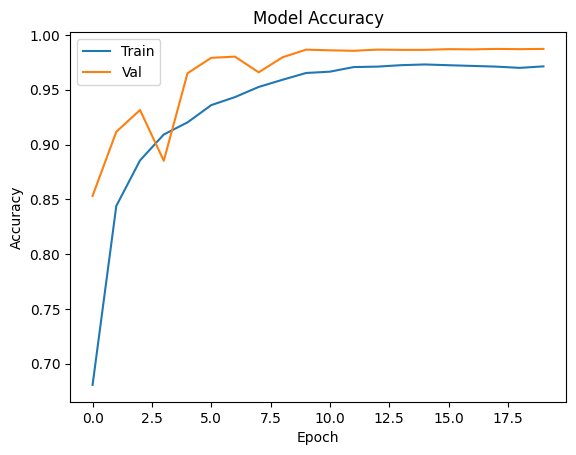

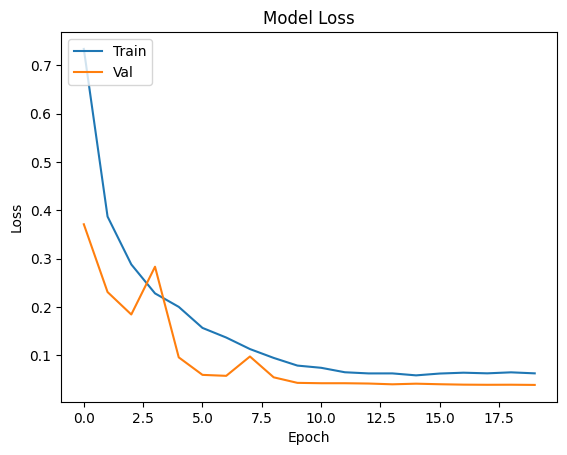

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
import time

# Timing a single batch to estimate the total time for 32 batches
start_time = time.time()

# Take a single batch
batch = next(iter(test_ds))  # Get the first batch

# Predict on the batch
predictions = model.predict_on_batch(batch[0])

end_time = time.time()

# Calculate time for 1 batch
time_per_batch = end_time - start_time
print(f"Time per batch: {time_per_batch:.2f} seconds")

# Estimate time for 32 batches
total_time = time_per_batch * 143
print(f"Estimated total time for 32 batches: {total_time:.2f} seconds")


Time per batch: 0.39 seconds
Estimated total time for 32 batches: 55.33 seconds


In [ ]:
# Check how many batches the test dataset has
print(len(test_ds))  # This will show the number of batches in the test dataset


148


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Initialize empty lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Number of batches to process
num_batches = 148

# Iterate over the test dataset in batches
for i, (images, labels) in enumerate(test_ds):
    if i >= num_batches:
        break  # Stop once 143 batches are processed

    print(f"Processing batch {i+1}/{num_batches}")  # Track the batch number

    # Append true labels to the list
    true_labels.append(labels)  # Directly append labels since it's already a NumPy array

    # Get predictions from the model (for this batch)
    predictions = model.predict(images)  # Predict for the batch
    predicted_labels.append(np.argmax(predictions, axis=1))  # Get the predicted class

# Convert the lists to NumPy arrays
true_labels = np.concatenate(true_labels, axis=0)  # Flatten true labels
predicted_labels = np.concatenate(predicted_labels, axis=0)  # Flatten predicted labels

# Ensure that both true_labels and predicted_labels are in the correct format (integer class labels)
true_labels = np.argmax(true_labels, axis=1) if true_labels.ndim > 1 else true_labels
predicted_labels = np.argmax(predicted_labels, axis=1) if predicted_labels.ndim > 1 else predicted_labels

Processing batch 1/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing batch 2/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing batch 3/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing batch 4/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processing batch 5/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing batch 6/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing batch 7/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing batch 8/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch 9/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch 10/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing batch 11/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing batch 12/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing batch 13/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 14/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 15/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch 16/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing batch 

In [ ]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=["Rice", "Corn", "Wheat", "Strawberry", "Tomato"])
print(report)

              precision    recall  f1-score   support

        Rice       0.99      0.98      0.98       716
        Corn       0.98      1.00      0.99       564
       Wheat       0.96      0.96      0.96       447
  Strawberry       0.99      0.99      0.99      2457
      Tomato       1.00      1.00      1.00       529

    accuracy                           0.99      4713
   macro avg       0.98      0.98      0.98      4713
weighted avg       0.99      0.99      0.99      4713



# MLP ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the MLP-ANN Model
mlpmodel = models.Sequential([
    layers.Flatten(input_shape=(128, 128, 3)),  # Adjust input shape
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # Match classes (5 classes)
])


# Compile the model
mlpmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = mlpmodel.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks,
    class_weight=class_weights
)

# Evaluate the model
test_loss, test_acc = mlpmodel.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.1556 - loss: 3.3309 - val_accuracy: 0.0963 - val_loss: 1.6226
Epoch 2/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 89s 129ms/step - accuracy: 0.0994 - loss: 1.6237 - val_accuracy: 0.1219 - val_loss: 1.6213
Epoch 3/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 89s 128ms/step - accuracy: 0.1227 - loss: 1.6400 - val_accuracy: 0.1221 - val_loss: 1.6190
Epoch 4/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 89s 128ms/step - accuracy: 0.1232 - loss: 1.6243 - val_accuracy: 0.1221 - val_loss: 1.6226
Epoch 5/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 88s 128ms/step - accuracy: 0.1229 - loss: 1.6337 - val_accuracy: 0.1221 - val_loss: 1.6199
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1053 - loss: 1.6226
Test Accuracy: 0.10


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Initialize empty lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Number of batches to process
num_batches = 148

# Iterate over the test dataset in batches
for i, (images, labels) in enumerate(test_ds):
    if i >= num_batches:
        break  # Stop once 143 batches are processed

    print(f"Processing batch {i+1}/{num_batches}")  # Track the batch number

    # Append true labels to the list
    true_labels.append(labels)  # Directly append labels since it's already a NumPy array

    # Get predictions from the model (for this batch)
    predictions = mlpmodel.predict(images)  # Predict for the batch
    predicted_labels.append(np.argmax(predictions, axis=1))  # Get the predicted class

# Convert the lists to NumPy arrays
true_labels = np.concatenate(true_labels, axis=0)  # Flatten true labels
predicted_labels = np.concatenate(predicted_labels, axis=0)  # Flatten predicted labels

# Ensure that both true_labels and predicted_labels are in the correct format (integer class labels)
true_labels = np.argmax(true_labels, axis=1) if true_labels.ndim > 1 else true_labels
predicted_labels = np.argmax(predicted_labels, axis=1) if predicted_labels.ndim > 1 else predicted_labels

Processing batch 1/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Processing batch 2/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 3/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing batch 4/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch 5/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing batch 6/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch 7/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 8/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing batch 9/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 10/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing batch 11/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing batch 12/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 13/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 14/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 15/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 16/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch

In [ ]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=["Rice", "Corn", "Wheat", "Strawberry", "Tomato"])
print(report)

              precision    recall  f1-score   support

        Rice       0.00      0.00      0.00       726
        Corn       0.00      0.00      0.00       576
       Wheat       0.10      1.00      0.18       460
  Strawberry       1.00      0.00      0.00      2403
      Tomato       0.00      0.00      0.00       548

    accuracy                           0.10      4713
   macro avg       0.22      0.20      0.04      4713
weighted avg       0.52      0.10      0.02      4713



#DMCNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_dmc_nn(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Multi-scale convolutional layers
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(inputs)
    conv2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(128, (7, 7), activation='relu', padding='same')(inputs)
    conv3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    # Concatenate multi-scale feature maps
    concatenated = layers.concatenate([conv1, conv2, conv3], axis=-1)

    # Multi-branch feature extraction
    branch1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated)
    branch1 = layers.GlobalAveragePooling2D()(branch1)

    branch2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated)
    branch2 = layers.GlobalMaxPooling2D()(branch2)

    # Merge branches
    merged = layers.concatenate([branch1, branch2], axis=-1)

    # Fully connected layers
    fc = layers.Dense(256, activation='relu')(merged)
    fc = layers.Dropout(0.5)(fc)
    fc = layers.Dense(128, activation='relu')(fc)
    fc = layers.Dropout(0.5)(fc)

    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(fc)

    dmcnnmodel = models.Model(inputs, outputs)
    return dmcnnmodel

dmcnnmodel = build_dmc_nn(input_shape=(128,128,3), num_classes=5)

# Compile the model
dmcnnmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = dmcnnmodel.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks,
    class_weight=class_weights
)

# Evaluate the model
test_loss, test_acc = dmcnnmodel.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 110s 145ms/step - accuracy: 0.5266 - loss: 1.0643 - val_accuracy: 0.9475 - val_loss: 0.1493
Epoch 2/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 90s 130ms/step - accuracy: 0.8904 - loss: 0.2890 - val_accuracy: 0.9513 - val_loss: 0.1410
Epoch 3/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 90s 130ms/step - accuracy: 0.9223 - loss: 0.2029 - val_accuracy: 0.9814 - val_loss: 0.0584
Epoch 4/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 90s 130ms/step - accuracy: 0.9452 - loss: 0.1581 - val_accuracy: 0.9603 - val_loss: 0.1643
Epoch 5/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 90s 130ms/step - accuracy: 0.9541 - loss: 0.1384 - val_accuracy: 0.9842 - val_loss: 0.0499
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9510 - loss: 0.1452
Test Accuracy: 0.95


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Initialize empty lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Number of batches to process
num_batches = 148

# Iterate over the test dataset in batches
for i, (images, labels) in enumerate(test_ds):
    if i >= num_batches:
        break  # Stop once 143 batches are processed

    print(f"Processing batch {i+1}/{num_batches}")  # Track the batch number

    # Append true labels to the list
    true_labels.append(labels)  # Directly append labels since it's already a NumPy array

    # Get predictions from the model (for this batch)
    predictions = dmcnnmodel.predict(images)  # Predict for the batch
    predicted_labels.append(np.argmax(predictions, axis=1))  # Get the predicted class

# Convert the lists to NumPy arrays
true_labels = np.concatenate(true_labels, axis=0)  # Flatten true labels
predicted_labels = np.concatenate(predicted_labels, axis=0)  # Flatten predicted labels

# Ensure that both true_labels and predicted_labels are in the correct format (integer class labels)
true_labels = np.argmax(true_labels, axis=1) if true_labels.ndim > 1 else true_labels
predicted_labels = np.argmax(predicted_labels, axis=1) if predicted_labels.ndim > 1 else predicted_labels

Processing batch 1/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch 2/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 3/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 4/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 5/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing batch 6/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch 7/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 8/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch 9/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 10/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 11/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 12/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing batch 13/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 14/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 15/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing batch 16/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing batch 

In [ ]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=["Rice", "Corn", "Wheat", "Strawberry", "Tomato"])
print(report)

              precision    recall  f1-score   support

        Rice       0.99      0.91      0.95       727
        Corn       0.91      0.96      0.94       573
       Wheat       0.79      0.96      0.86       437
  Strawberry       0.97      0.96      0.96      2441
      Tomato       0.98      0.93      0.95       535

    accuracy                           0.95      4713
   macro avg       0.93      0.94      0.93      4713
weighted avg       0.95      0.95      0.95      4713



# MConvNext

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Define MConvNeXt block
def mconvnext_block(input_tensor):
    # Parallel branches with 3×3, 5×5, and 7×7 depthwise separable convolutions
    conv3x3 = layers.DepthwiseConv2D(kernel_size=3, padding="same")(input_tensor)
    conv5x5 = layers.DepthwiseConv2D(kernel_size=5, padding="same")(input_tensor)
    conv7x7 = layers.DepthwiseConv2D(kernel_size=7, padding="same")(input_tensor)

    # Concatenate outputs
    concat = layers.Concatenate()([conv3x3, conv5x5, conv7x7])

    # Pointwise convolution to combine features
    output = layers.Conv2D(filters=input_tensor.shape[-1], kernel_size=1, padding="same")(concat)
    return output

# Build the MConvNeXt model
def build_mconvnext(input_shape=(224, 224, 3), num_classes=5):
    inputs = tf.keras.Input(shape=input_shape)

    # Initial ConvNeXt stem
    x = layers.Conv2D(64, kernel_size=4, strides=4, padding="same")(inputs)
    x = layers.LayerNormalization()(x)

    # MConvNeXt blocks
    for _ in range(4):  # Example depth of 4 blocks
        x = mconvnext_block(x)
        x = layers.LayerNormalization()(x)

    # Global average pooling and classification head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    mcnmodel = models.Model(inputs, outputs)
    return mcnmodel

# Recompile the model
mcnmodel = build_mconvnext(input_shape=(128, 128, 3), num_classes=5)
mcnmodel.compile(optimizer=optimizers.AdamW(learning_rate=0.001),
                 loss="sparse_categorical_crossentropy",  # Sparse loss for integer-encoded labels
                 metrics=["accuracy"])

import numpy as np

# Custom generator to convert one-hot labels to integer labels
def custom_generator(iterator):
    for x_batch, y_batch in iterator:
        # Convert one-hot encoded labels to integer labels
        y_batch_int = np.argmax(y_batch, axis=-1)
        yield x_batch, y_batch_int

# Apply the generator for training, validation, and test datasets
train_ds_int = custom_generator(train_ds)
val_ds_int = custom_generator(val_ds)
test_ds_int = custom_generator(test_ds)
batch_size=32
# Calculate steps per epoch based on the length of the dataset and batch size
train_steps = len(train_ds) // batch_size
val_steps = len(val_ds) // batch_size

history = mcnmodel.fit(
    train_ds_int,
    epochs=20,
    validation_data=val_ds_int,
    steps_per_epoch=train_steps,  # Specify steps per epoch
    validation_steps=val_steps,  # Specify validation steps
    callbacks=callbacks,  # Assuming callbacks are defined
)



Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.3601 - loss: 1.9907 - val_accuracy: 0.0000e+00 - val_loss: 2.2185
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.5145 - loss: 1.3414 - val_accuracy: 0.0000e+00 - val_loss: 1.8468
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.5686 - loss: 1.2253 - val_accuracy: 0.0391 - val_loss: 1.6337
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.6193 - loss: 1.0395 - val_accuracy: 0.2344 - val_loss: 1.6518
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.6346 - loss: 1.0354 - val_accuracy: 0.4531 - val_loss: 1.2867


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Initialize empty lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Number of batches to process
num_batches = 148

# Iterate over the test dataset in batches
for i, (images, labels) in enumerate(test_ds):
    if i >= num_batches:
        break  # Stop once 143 batches are processed

    print(f"Processing batch {i+1}/{num_batches}")  # Track the batch number

    # Append true labels to the list
    true_labels.append(labels)  # Directly append labels since it's already a NumPy array

    # Get predictions from the model (for this batch)
    predictions = mcnmodel.predict(images)  # Predict for the batch
    predicted_labels.append(np.argmax(predictions, axis=1))  # Get the predicted class

# Convert the lists to NumPy arrays
true_labels = np.concatenate(true_labels, axis=0)  # Flatten true labels
predicted_labels = np.concatenate(predicted_labels, axis=0)  # Flatten predicted labels

# Ensure that both true_labels and predicted_labels are in the correct format (integer class labels)
true_labels = np.argmax(true_labels, axis=1) if true_labels.ndim > 1 else true_labels
predicted_labels = np.argmax(predicted_labels, axis=1) if predicted_labels.ndim > 1 else predicted_labels

Processing batch 1/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step
Processing batch 2/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing batch 3/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch 4/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing batch 5/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 6/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 7/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing batch 8/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing batch 9/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing batch 10/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing batch 11/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch 12/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing batch 13/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing batch 14/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing batch 15/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing batch 16/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing batch

In [ ]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=["Rice", "Corn", "Wheat", "Strawberry", "Tomato"])
print(report)

              precision    recall  f1-score   support

        Rice       0.00      0.00      0.00       727
        Corn       0.00      0.00      0.00       577
       Wheat       0.00      0.00      0.00       457
  Strawberry       0.51      1.00      0.68      2413
      Tomato       0.00      0.00      0.00       539

    accuracy                           0.51      4713
   macro avg       0.10      0.20      0.14      4713
weighted avg       0.26      0.51      0.35      4713



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# MSCPNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

class PoolFormer(layers.Layer):
    """Implements a non-parametric pooling operation."""
    def call(self, inputs):
        return tf.reduce_mean(inputs, axis=(1, 2), keepdims=True)

def multi_scale_conv_poolformer_block(input_tensor, in_channels):
    # Multi-Scale Convolutions
    conv1x1 = layers.Conv2D(in_channels // 4, kernel_size=1)(input_tensor)
    conv2x2 = layers.Conv2D(in_channels // 4, kernel_size=2, padding="same")(input_tensor)
    conv3x3 = layers.Conv2D(in_channels // 4, kernel_size=3, padding="same")(input_tensor)
    conv5x5 = layers.Conv2D(in_channels // 4, kernel_size=5, padding="same")(input_tensor)

    # Apply PoolFormer (average pooling)
    poolformer = PoolFormer()
    branch2 = poolformer(conv2x2)
    branch3 = poolformer(conv3x3)
    branch4 = poolformer(conv5x5)

    # Upsample the pooled branches to match the size of conv1x1 (4x4)
    upsample = layers.UpSampling2D(size=(4, 4), interpolation="nearest")
    branch2 = upsample(branch2)
    branch3 = upsample(branch3)
    branch4 = upsample(branch4)

    # Concatenate all branches
    concat = layers.Concatenate()([conv1x1, branch2, branch3, branch4])

    # Final pointwise convolution and LayerNormalization
    output = layers.Conv2D(in_channels, kernel_size=1, padding="same")(concat)
    output = layers.LayerNormalization()(output)

    return output


def build_mscpnet(input_shape=(224, 224, 3), num_classes=5):
    inputs = tf.keras.Input(shape=input_shape)

    # MobileNetV2 backbone
    base_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=input_shape)
    x = base_model(inputs)

    # MSCPNet block (Multi-Scale Convolution and PoolFormer)
    x = multi_scale_conv_poolformer_block(x, in_channels=1280)

    # Global average pooling and classification head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    mscpnet_model = models.Model(inputs, outputs)
    return mscpnet_model

# Build and compile the model
mscpnet_model = build_mscpnet(input_shape=(128, 128, 3), num_classes=5)
mscpnet_model.compile(optimizer=optimizers.AdamW(learning_rate=0.001),
                      loss="categorical_crossentropy",  # Changed to categorical_crossentropy
                      metrics=["accuracy"])

# Example: Assuming train_ds, val_ds, test_ds, callbacks, and class_weights are defined
history = mscpnet_model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks,
    class_weight=class_weights
)

# Evaluate the model
test_loss, test_acc = mscpnet_model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")


Epoch 1/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 166s 172ms/step - accuracy: 0.8539 - loss: 0.9546 - val_accuracy: 0.1149 - val_loss: 7.4975
Epoch 2/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 92s 133ms/step - accuracy: 0.9437 - loss: 0.1852 - val_accuracy: 0.5442 - val_loss: 2.0374
Epoch 3/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 92s 132ms/step - accuracy: 0.9618 - loss: 0.1167 - val_accuracy: 0.8335 - val_loss: 0.9769
Epoch 4/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 92s 133ms/step - accuracy: 0.9656 - loss: 0.1054 - val_accuracy: 0.9626 - val_loss: 0.1435
Epoch 5/20
685/685 ━━━━━━━━━━━━━━━━━━━━ 93s 134ms/step - accuracy: 0.9775 - loss: 0.0676 - val_accuracy: 0.8992 - val_loss: 0.3610
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.1120 - loss: 7.5266
Test Accuracy: 0.11


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Initialize empty lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Number of batches to process
num_batches = 148

# Iterate over the test dataset in batches
for i, (images, labels) in enumerate(test_ds):
    if i >= num_batches:
        break  # Stop once 143 batches are processed

    print(f"Processing batch {i+1}/{num_batches}")  # Track the batch number

    # Append true labels to the list
    true_labels.append(labels)  # Directly append labels since it's already a NumPy array

    # Get predictions from the model (for this batch)
    predictions = mscpnet_model.predict(images)  # Predict for the batch
    predicted_labels.append(np.argmax(predictions, axis=1))  # Get the predicted class

# Convert the lists to NumPy arrays
true_labels = np.concatenate(true_labels, axis=0)  # Flatten true labels
predicted_labels = np.concatenate(predicted_labels, axis=0)  # Flatten predicted labels

# Ensure that both true_labels and predicted_labels are in the correct format (integer class labels)
true_labels = np.argmax(true_labels, axis=1) if true_labels.ndim > 1 else true_labels
predicted_labels = np.argmax(predicted_labels, axis=1) if predicted_labels.ndim > 1 else predicted_labels

Processing batch 1/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing batch 2/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processing batch 3/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processing batch 4/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing batch 5/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing batch 6/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processing batch 7/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing batch 8/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing batch 9/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing batch 10/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing batch 11/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing batch 12/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing batch 13/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing batch 14/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing batch 15/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processing batch 16/148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing batch 17

In [ ]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=["Rice", "Corn", "Wheat", "Strawberry", "Tomato"])
print(report)

              precision    recall  f1-score   support

        Rice       0.00      0.00      0.00       715
        Corn       0.00      0.00      0.00       593
       Wheat       0.00      0.00      0.00       447
  Strawberry       0.00      0.00      0.00      2396
      Tomato       0.12      1.00      0.21       562

    accuracy                           0.12      4713
   macro avg       0.02      0.20      0.04      4713
weighted avg       0.01      0.12      0.03      4713



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
